<a href="https://colab.research.google.com/github/Mrsnellek/MSDS_686_22F8W2/blob/23S8W1/MSDS%20686/Week_3/MNIST_Regularization_and_Dropout_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digits Regularization and Dropout Assignment
## Adapted from Deep Learning with Python by Francois Chollet
#### Use the MNIST digit dataset to classify digits 0 - 9 into 10 different categories.  Use regularization and early stopping to improve your neural network.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/cq/h9b2vxfd42sc_hkml7gp1d2m0000gn/T/ipykernel_30306/1226147920.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Import all the necessary libraries
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [58]:
# Import the MNIST data set from the Keras library. https://keras.io/datasets/
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

#code source: https://keras.io/api/datasets/mnist/#load_data-function

Comment: through the import example we already know the shape of dataset and labels, therefore we can skip some EDA process. 

In [59]:
#check max & min values: 
print('min value in the array: ', x_train.min())
print('max value in the array: ', x_train.max())


min value in the array:  0
max value in the array:  255


Comment: 0 - 255, one color way, then it's the color range for black and white and different shades of grey.

In [60]:
# check unique y values
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Comment: 10 values in total

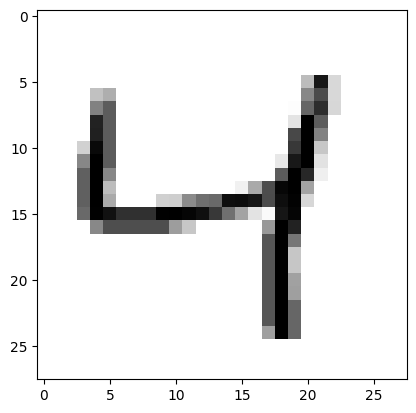

In [61]:
# take a look at one of the data and print it out 
import matplotlib.pyplot as plt
example_pic = x_train[2]
plt.imshow(example_pic,cmap=plt.cm.binary)
plt.show()

In [62]:
# Reshape and normalize the images for your neural net
# reshape the dataset to 2 dimensions and normalize the values between 0 and 1
divide_by = x_train.max()
x_train = x_train.reshape((60000,28 * 28))
x_train = x_train.astype('float32')/divide_by

x_test = x_test.reshape((10000,28 * 28))
x_test = x_test.astype('float32')/divide_by

In [63]:
# Convert the labels into categorical values.
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [64]:
y_train.shape

(60000, 10)

In [69]:
# Split the data into training and validation
x_train_s, x_val, y_train_s, y_val = train_test_split(x_train,y_train,test_size=0.2, random_state= 42)

## In each Jupyter Notebook cell build a model using your test and validation data, show loss and accuracy monitoring graphs, and evaluate your model on the test data *all in one cell*.  

## Build at least 7 different models. Use markdown above the code cell to explain what you are changing/testing in the subsequent model. 

## Build models with different learning rates, batch sizes, dropout, regularization, and hidden layers and nodes.  Be strategic in how you go about optimizing your model. The last model of your notebook should be your best model. 


In [80]:
# Import the keras libraries
from keras import models, layers, regularizers
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras import backend
from keras.optimizers import Adam

### Model 1 
- leanring rate: 0.001
- batch size: 120
- dropout: N/A
- batch Normalization: N/A
- regularization: N/A
- num of layers: 4
- units: [80, 40, 20, 10]
- optimizer: adam (according to google AI: this one is best for image classification problems) 


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7255 - loss: 0.9069 - val_accuracy: 0.9356 - val_loss: 0.2230
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.9401 - loss: 0.2074 - val_accuracy: 0.9523 - val_loss: 0.1587
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9594 - loss: 0.1430 - val_accuracy: 0.9592 - val_loss: 0.1386
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9665 - loss: 0.1128 - val_accuracy: 0.9632 - val_loss: 0.1244
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.9728 - loss: 0.0900 - val_accuracy: 0.9668 - val_loss: 0.1109
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.9781 - loss: 0.0730 - val_accuracy: 0.9657 - val_loss: 0.1147
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.9811 - loss: 0.0628 - val_accuracy: 0.9689 - val_loss: 0.1044
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.9840 - loss: 0.0526 - va

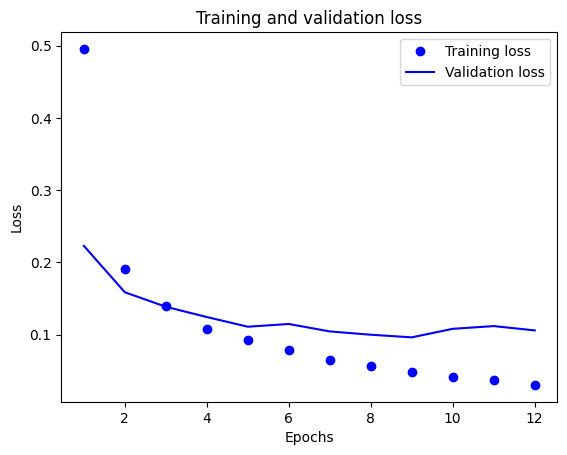

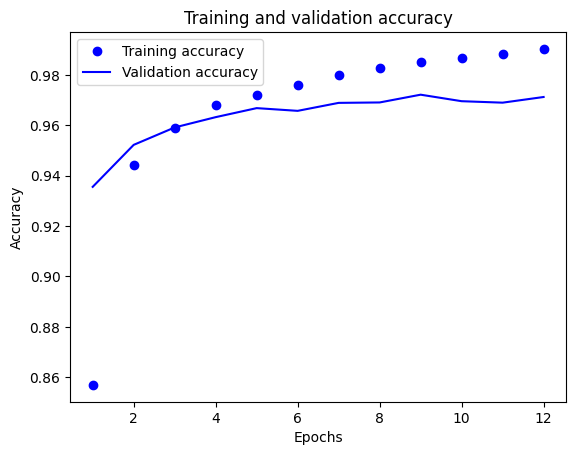

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9678 - loss: 0.1156
['loss', 'compile_metrics']
[0.09822327643632889, 0.9710999727249146]


In [93]:
# Add Dropouts, batch normalization, add more hidden layers with more hidden units
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(80, activation = 'relu',input_shape = (28 * 28,)))
model.add(layers.Dense(40, activation = 'relu'))
model.add(layers.Dense(20, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer=Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train_s,
                   y_train_s,
                   epochs = 20,
                   batch_size = 120,
                   validation_data = (x_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

### Model 1 result: 
- runtime: 5.7s
- actual epochs: 12
- test loss: 0.0982
- test accuracy: 0.9711

### Model 2 (focus: num of layers, units):
- leanring rate: 0.001
- batch size: 120
- dropout: N/A
- batch Normalization: N/A
- regularization: N/A
- ***<font color='orange'>num of layers: 6</font>***
- ***<font color='orange'>units: [640, 320, 160, 80, 40, 20, 10]</font>***
- optimizer: adam (according to google AI: this one is best for image classification problems) 

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8371 - loss: 0.5290 - val_accuracy: 0.9592 - val_loss: 0.1329
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9683 - loss: 0.1006 - val_accuracy: 0.9681 - val_loss: 0.1046
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9793 - loss: 0.0664 - val_accuracy: 0.9740 - val_loss: 0.0954
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9849 - loss: 0.0479 - val_accuracy: 0.9733 - val_loss: 0.0934
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.9763 - val_loss: 0.0912
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9897 - loss: 0.0312 - val_accuracy: 0.9731 - val_loss: 0.1043
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9782 - val_loss: 0.0904
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9933 - loss: 0.0211 - val_accuracy: 0.

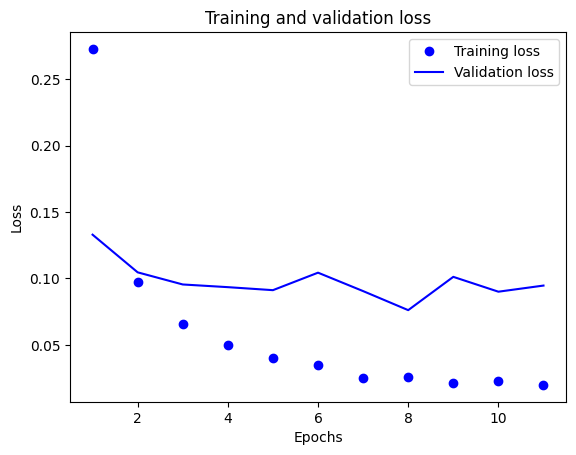

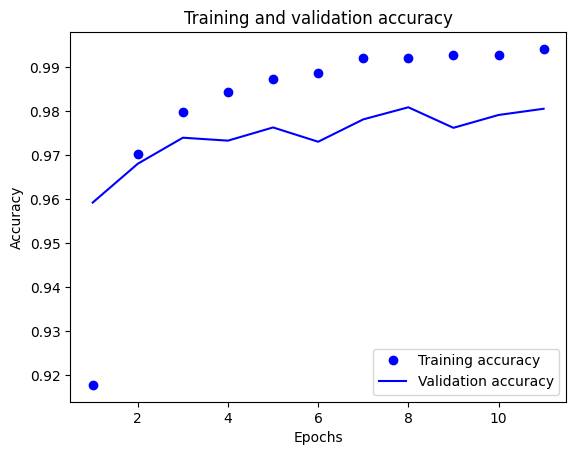

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.9774 - loss: 0.0815
['loss', 'compile_metrics']
[0.06703899055719376, 0.9812999963760376]


In [94]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(640, activation = 'relu',input_shape = (28 * 28,)))
#model.add(layers.Dense(640, activation = 'relu'))
model.add(layers.Dense(320, activation = 'relu'))
model.add(layers.Dense(160, activation = 'relu'))
model.add(layers.Dense(80, activation = 'relu'))
model.add(layers.Dense(40, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer=Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train_s,
                   y_train_s,
                   epochs = 20,
                   batch_size = 120,
                   validation_data = (x_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

### Model 2 result: 
- runtime: 22.8s <font color = 'red'>&#8593;</font>
- actual epochs: 11 <font color = 'green'>&#8595;</font>
- test loss: 0.0670 <font color = 'green'>&#8595;</font>
- test accuracy: 0.9813 <font color = 'green'>&#8593;</font>

Summary:
I focused on getting the right number of layers and units for each layer while not taking a long time to train it. Model 2 takes may tries. However, the result is pleasing.
I found 5 layers takes almost the same times as 6 layers due to more epochs to reach the maximum. Also, 5 layers has slightly less accuracy as 6 layers. 
7 layers takers double the time to train and gets a accuracy less than 6 layers.
Therefore, 6 layers with the units mentioned in the title is the best solution. 


### Model 3 (focus: regularization):
- leanring rate: 0.001
- batch size: 120
- dropout: N/A
- batch Normalization: N/A
- ***<font color='orange'>regularization: L1: 0.001, L2: 0.001</font>***
- num of layers: 6
- units: [640, 320, 160, 80, 40, 20, 10]
- optimizer: adam (according to google AI: this one is best for image classification problems) 

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7465 - loss: 10.2270 - val_accuracy: 0.8915 - val_loss: 1.7344
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8930 - loss: 1.5846 - val_accuracy: 0.9139 - val_loss: 1.2290
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9155 - loss: 1.1730 - val_accuracy: 0.9218 - val_loss: 1.0314
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9211 - loss: 1.0055 - val_accuracy: 0.9209 - val_loss: 0.9335
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9291 - loss: 0.8914 - val_accuracy: 0.9312 - val_loss: 0.8367
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9299 - loss: 0.8286 - val_accuracy: 0.9312 - val_loss: 0.7834
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9334 - loss: 0.7753 - val_accuracy: 0.9333 - val_loss: 0.7396
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9335 - loss: 0.7342 - val_accuracy: 0

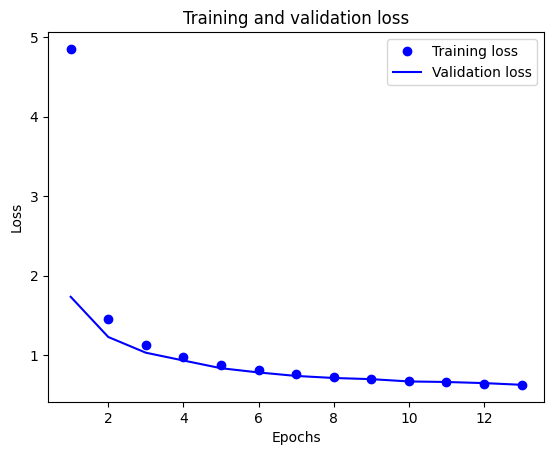

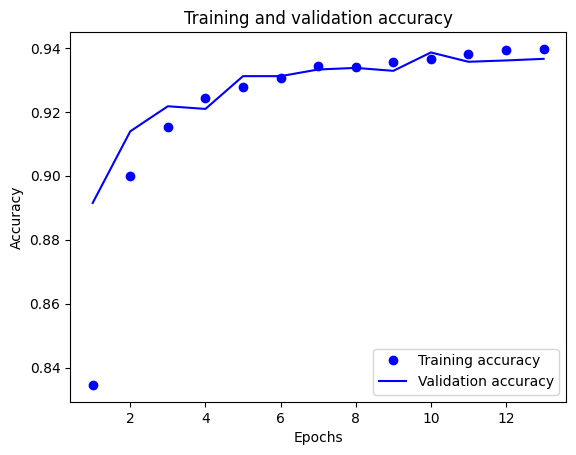

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.9311 - loss: 0.6817
['loss', 'compile_metrics']
[0.6599929332733154, 0.9391999840736389]


In [96]:
# add L1 and L2 regularization
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(640, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001), input_shape = (28 * 28,)))
#model.add(layers.Dense(640, activation = 'relu'))
model.add(layers.Dense(320, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001), activation = 'relu'))
model.add(layers.Dense(160, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001), activation = 'relu'))
model.add(layers.Dense(80, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001), activation = 'relu'))
model.add(layers.Dense(40, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001), activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer=Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train_s,
                   y_train_s,
                   epochs = 20,
                   batch_size = 120,
                   validation_data = (x_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

### Model 3 result: 
- runtime: 31.2s <font color = 'red'>&#8593;</font>
- actual epochs: 13 <font color = 'red'>&#8593;</font>
- test loss: 0.6600 <font color = 'red'>&#8593;</font>
- test accuracy: 0.9392 <font color = 'red'>&#8595;</font>

Summary:
Adding the default learning rate not only added more time to train, the loss increased dramatically and accuracy drop by about 4%. I will play with the learning rate next model. 

### Model 4 (focus: regularization):
- leanring rate: 0.001
- batch size: 120
- dropout: N/A
- batch Normalization: N/A
- ***<font color='orange'>regularization: L1: 0.0001, L2: 0.0001</font>***
- num of layers: 6
- units: [640, 320, 160, 80, 40, 20, 10]
- optimizer: adam (according to google AI: this one is best for image classification problems) 

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8170 - loss: 2.3190 - val_accuracy: 0.9435 - val_loss: 0.9940
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9504 - loss: 0.8763 - val_accuracy: 0.9513 - val_loss: 0.6620
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9631 - loss: 0.5792 - val_accuracy: 0.9659 - val_loss: 0.4714
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9699 - loss: 0.4400 - val_accuracy: 0.9668 - val_loss: 0.4012
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9737 - loss: 0.3621 - val_accuracy: 0.9716 - val_loss: 0.3429
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9756 - loss: 0.3225 - val_accuracy: 0.9726 - val_loss: 0.3147
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9777 - loss: 0.2890 - val_accuracy: 0.9721 - val_loss: 0.2942
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9792 - loss: 0.2657 - val_accuracy: 0.

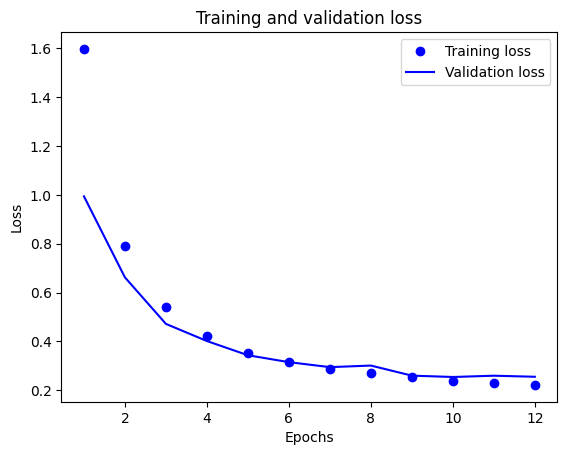

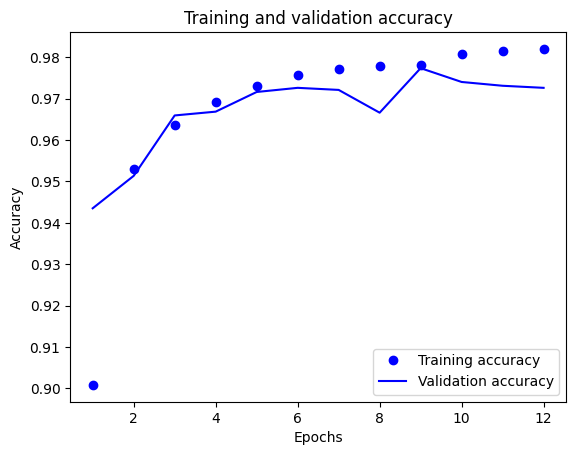

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.9730 - loss: 0.2702
['loss', 'compile_metrics']
[0.255141943693161, 0.9764999747276306]


In [97]:
# adjusting L1 and L2 regularization
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(640, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l1 = 0.0001, l2 = 0.0001), input_shape = (28 * 28,)))
#model.add(layers.Dense(640, activation = 'relu'))
model.add(layers.Dense(320, kernel_regularizer = regularizers.l1_l2(l1 = 0.0001, l2 = 0.0001), activation = 'relu'))
model.add(layers.Dense(160, kernel_regularizer = regularizers.l1_l2(l1 = 0.0001, l2 = 0.0001), activation = 'relu'))
model.add(layers.Dense(80, kernel_regularizer = regularizers.l1_l2(l1 = 0.0001, l2 = 0.0001), activation = 'relu'))
model.add(layers.Dense(40, kernel_regularizer = regularizers.l1_l2(l1 = 0.0001, l2 = 0.0001), activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer=Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train_s,
                   y_train_s,
                   epochs = 20,
                   batch_size = 120,
                   validation_data = (x_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

### Model 4 result: 
- runtime: 27.4s <font color = 'green'>&#8595;</font>
- actual epochs: 12 <font color = 'green'>&#8595;</font>
- test loss: 0.2551 <font color = 'green'>&#8595;</font>
- test accuracy: 0.9765 <font color = 'green'>&#8593;</font>

Summary:
Decreasing L1 and L2 by 10 times resulting in much better result overall. The accuracy has outperformed first model but loss is still significantly higher than first two model with out regularization. Maby try reduce one more time to see the result.

### Model 5 (focus: regularization):
- leanring rate: 0.001
- batch size: 120
- dropout: N/A
- batch Normalization: N/A
- ***<font color='orange'>regularization: L1: 0.000001, L2: 0.000001</font>***
- num of layers: 6
- units: [640, 320, 160, 80, 40, 20, 10]
- optimizer: adam (according to google AI: this one is best for image classification problems) 

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8271 - loss: 0.5813 - val_accuracy: 0.9574 - val_loss: 0.1667
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9699 - loss: 0.1271 - val_accuracy: 0.9690 - val_loss: 0.1275
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9791 - loss: 0.0926 - val_accuracy: 0.9756 - val_loss: 0.1105
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9847 - loss: 0.0743 - val_accuracy: 0.9723 - val_loss: 0.1176
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9876 - loss: 0.0638 - val_accuracy: 0.9737 - val_loss: 0.1193
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9912 - loss: 0.0549 - val_accuracy: 0.9687 - val_loss: 0.1405


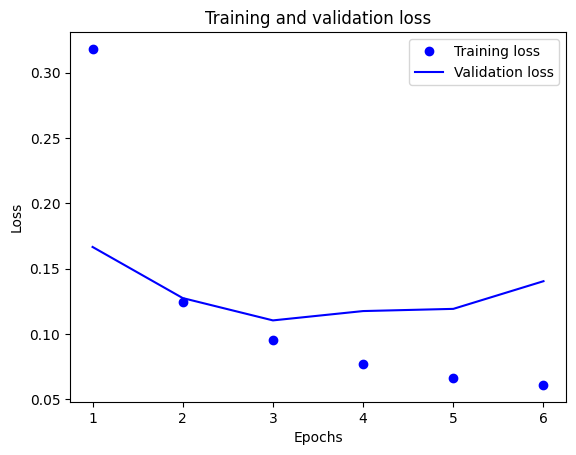

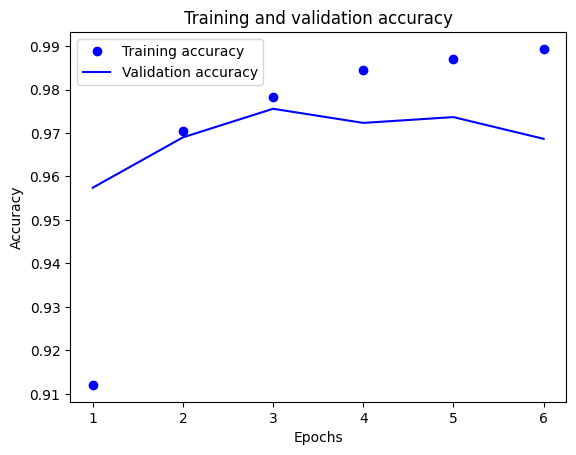

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.9727 - loss: 0.1154
['loss', 'compile_metrics']
[0.10590949654579163, 0.9753000140190125]


In [99]:
# adjusting L1 and L2 regularization
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(640, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l1 = 0.000001, l2 = 0.000001), input_shape = (28 * 28,)))
model.add(layers.Dense(320, kernel_regularizer = regularizers.l1_l2(l1 = 0.000001, l2 = 0.000001), activation = 'relu'))
model.add(layers.Dense(160, kernel_regularizer = regularizers.l1_l2(l1 = 0.000001, l2 = 0.000001), activation = 'relu'))
model.add(layers.Dense(80, kernel_regularizer = regularizers.l1_l2(l1 = 0.000001, l2 = 0.000001), activation = 'relu'))
model.add(layers.Dense(40, kernel_regularizer = regularizers.l1_l2(l1 = 0.000001, l2 = 0.000001), activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer=Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train_s,
                   y_train_s,
                   epochs = 20,
                   batch_size = 120,
                   validation_data = (x_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

### Model 5 result: 
- runtime: 14.4s <font color = 'green'>&#8593;</font>
- actual epochs: 6 <font color = 'green'>&#8595;</font>
- test loss: 0.1059 <font color = 'green'>&#8595;</font>
- test accuracy: 0.9753 <font color = 'green'>&#8593;</font>

Summary:
I tried 0.00001, the result is really good, it returns the highest accuracy. 
That got me thinking if I should try 0.000001. I am surprised by the result. It gives a high enough accuracy with only 6 epochs and 14 seconds of training. In addition, the test loss decreased by 0.06 which is almost 50% from 0.00001. 

### Model 6 (focus: dropout):
- leanring rate: 0.001
- batch size: 120
- ***<font color='orange'>dropout: 0.2(idk, that's a good rate for traintest split, maybe good for dropout rate too)</font>***
- batch Normalization: N/A
- regularization: N/A
- num of layers: 6
- units: [640, 320, 160, 80, 40, 20, 10]
- optimizer: adam (according to google AI: this one is best for image classification problems) 

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7280 - loss: 0.8377 - val_accuracy: 0.9497 - val_loss: 0.1687
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9510 - loss: 0.1922 - val_accuracy: 0.9677 - val_loss: 0.1168
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9625 - loss: 0.1402 - val_accuracy: 0.9714 - val_loss: 0.1152
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9722 - loss: 0.1088 - val_accuracy: 0.9758 - val_loss: 0.0850
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9767 - loss: 0.0889 - val_accuracy: 0.9772 - val_loss: 0.0940
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9802 - loss: 0.0819 - val_accuracy: 0.9757 - val_loss: 0.0933
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9827 - loss: 0.0651 - val_accuracy: 0.9808 - val_loss: 0.0951
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9852 - loss: 0.0556 - val_accuracy: 0.

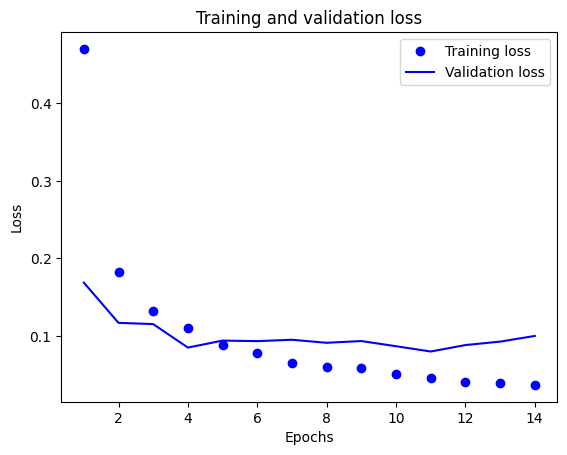

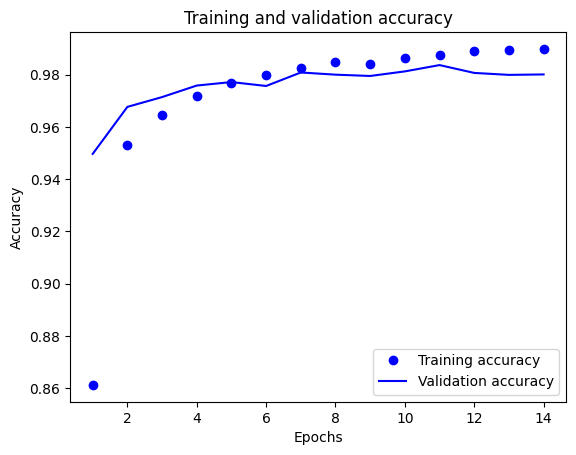

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.9764 - loss: 0.1111
['loss', 'compile_metrics']
[0.09070874005556107, 0.9807000160217285]


In [102]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(640, activation = 'relu',input_shape = (28 * 28,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(320, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(160, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(80, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(40, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer=Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train_s,
                   y_train_s,
                   epochs = 20,
                   batch_size = 120,
                   validation_data = (x_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

### Model 6 result: 
- runtime: 30.4s <font color = 'red'>&#8593;</font>
- actual epochs: 14 <font color = 'red'>&#8593;</font>
- test loss: 0.0907 <font color = 'green'>&#8595;</font>
- test accuracy: 0.9807 <font color = 'green'>&#8593;</font>

Summary:     
More run time, more epochs to get to the best model. However, the loss and accuracy is higher.

### Model 7 (focus: dropout):
- leanring rate: 0.001
- batch size: 120
- ***<font color='orange'>dropout: 0.1/0.3</font>***
- batch Normalization: N/A
- regularization: N/A
- num of layers: 6
- units: [640, 320, 160, 80, 40, 20, 10]
- optimizer: adam (according to google AI: this one is best for image classification problems) 

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6191 - loss: 1.1126 - val_accuracy: 0.9503 - val_loss: 0.1806
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9375 - loss: 0.2568 - val_accuracy: 0.9628 - val_loss: 0.1420
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9555 - loss: 0.1863 - val_accuracy: 0.9693 - val_loss: 0.1199
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9644 - loss: 0.1485 - val_accuracy: 0.9644 - val_loss: 0.1473
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9678 - loss: 0.1320 - val_accuracy: 0.9748 - val_loss: 0.1024
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9734 - loss: 0.1093 - val_accuracy: 0.9747 - val_loss: 0.1069
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9742 - loss: 0.1024 - val_accuracy: 0.9782 - val_loss: 0.0931
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9772 - loss: 0.0920 - val_accuracy: 0.9760 - val_

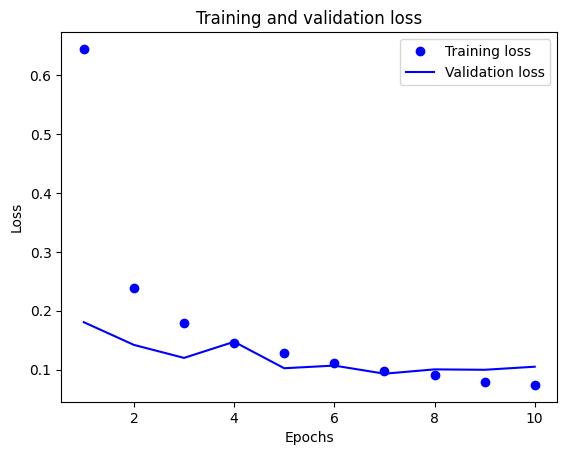

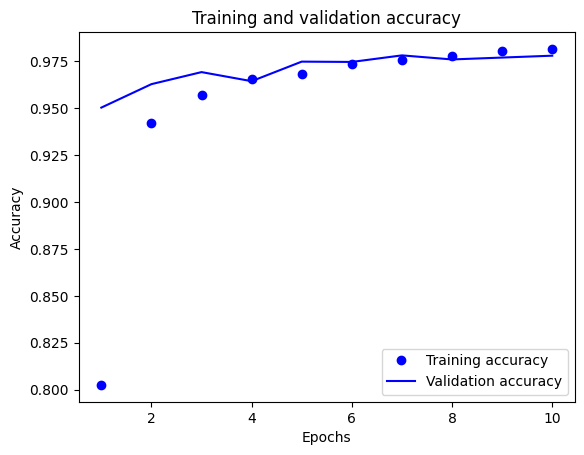

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.9754 - loss: 0.1031
['loss', 'compile_metrics']
[0.09393371641635895, 0.9771999716758728]


In [105]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(640, activation = 'relu',input_shape = (28 * 28,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(320, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(160, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(80, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(40, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer=Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train_s,
                   y_train_s,
                   epochs = 20,
                   batch_size = 120,
                   validation_data = (x_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

### Model 7 result: 
- runtime: 24.3s/ 22.7s <font color = 'red'>&#8593;</font>
- actual epochs: 10/ 10 <font color = 'red'>&#8593;</font>
- test loss: 0.0927/ 0.9393 <font color = 'green'>&#8595;</font>
- test accuracy: 0.9776/ 0.9772<font color = 'green'>&#8593;</font>

Summary:
I tried both 0.1 and 0.3 dropout rate, they are not better than 20% dropout rate. Looks like thats the magic number.

### Model 8 (focus: Batch normalization):
- leanring rate: 0.001
- batch size: 120
- dropout: N/A
- ***<font color='orange'>batch Normalization: True</font>***
- regularization: N/A
- num of layers: 6
- units: [640, 320, 160, 80, 40, 20, 10]
- optimizer: adam (according to google AI: this one is best for image classification problems) 

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8720 - loss: 0.4403 - val_accuracy: 0.9557 - val_loss: 0.1414
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9724 - loss: 0.0939 - val_accuracy: 0.9693 - val_loss: 0.0995
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9792 - loss: 0.0655 - val_accuracy: 0.9709 - val_loss: 0.0999
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9842 - loss: 0.0504 - val_accuracy: 0.9714 - val_loss: 0.0960
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9867 - loss: 0.0409 - val_accuracy: 0.9737 - val_loss: 0.0895
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9887 - loss: 0.0360 - val_accuracy: 0.9755 - val_loss: 0.0841
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9753 - val_loss: 0.0905
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9895 - loss: 0.0304 - val_accuracy: 0.

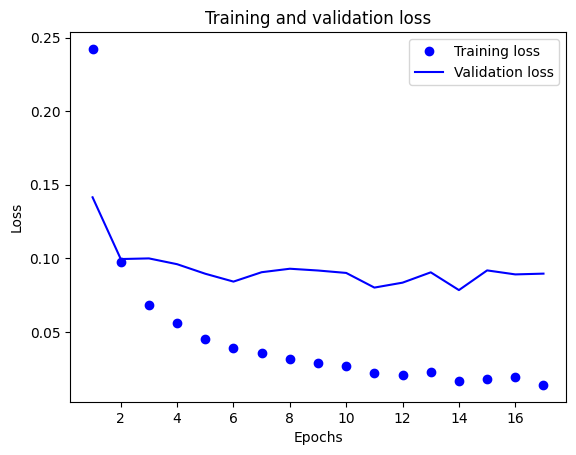

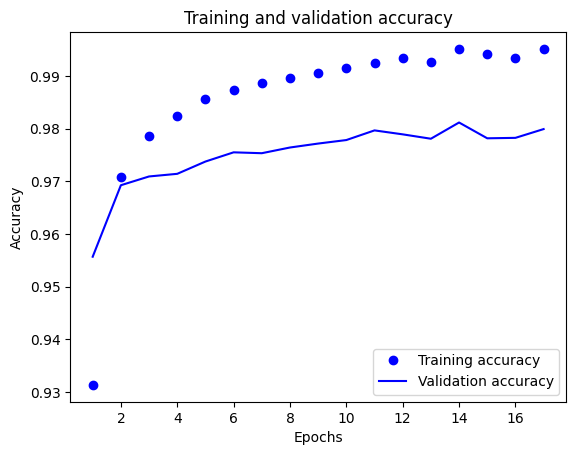

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.9737 - loss: 0.1003
['loss', 'compile_metrics']
[0.08306261897087097, 0.9782999753952026]


In [106]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(640, activation = 'relu',input_shape = (28 * 28,)))
model.add(BatchNormalization())
model.add(layers.Dense(320, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dense(160, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dense(80, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dense(40, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer=Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train_s,
                   y_train_s,
                   epochs = 20,
                   batch_size = 120,
                   validation_data = (x_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

### Model 8 result: 
- runtime: 41.2s <font color = 'red'>&#8593;</font>
- actual epochs: 17 <font color = 'red'>&#8593;</font>
- test loss: 0.0831 <font color = 'green'>&#8595;</font>
- test accuracy: 0.9783<font color = 'green'>&#8593;</font>

Summary:        
Adding batch normalization does not give the model better accuracy compare to model 2. It does do better than model 7 but it takes a lot more time to compute. 

### Model 9 (focus: Dropout & Batch normalization):
- leanring rate: 0.001
- batch size: 120
- ***<font color='orange'>dropout: 0.2</font>***
- ***<font color='orange'>batch Normalization: True</font>***
- regularization: N/A
- num of layers: 6
- units: [640, 320, 160, 80, 40, 20, 10]
- optimizer: adam (according to google AI: this one is best for image classification problems) 

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7087 - loss: 0.9705 - val_accuracy: 0.9558 - val_loss: 0.1518
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9408 - loss: 0.2228 - val_accuracy: 0.9658 - val_loss: 0.1231
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9553 - loss: 0.1615 - val_accuracy: 0.9728 - val_loss: 0.0993
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9657 - loss: 0.1320 - val_accuracy: 0.9725 - val_loss: 0.0987
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9688 - loss: 0.1119 - val_accuracy: 0.9737 - val_loss: 0.0989
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9713 - loss: 0.1054 - val_accuracy: 0.9784 - val_loss: 0.0827
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9750 - loss: 0.0915 - val_accuracy: 0.9759 - val_loss: 0.0937
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9772 - loss: 0.0823 - val_accuracy: 0.

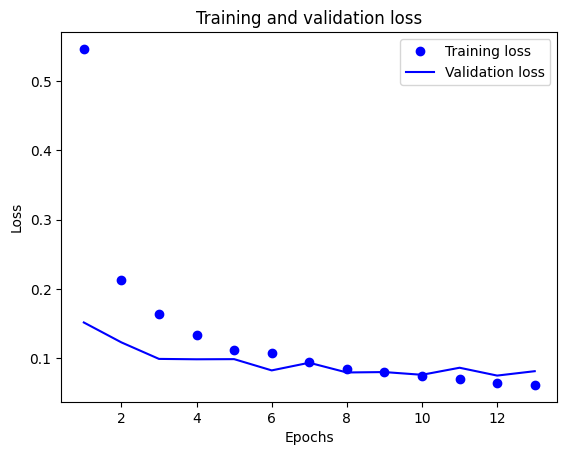

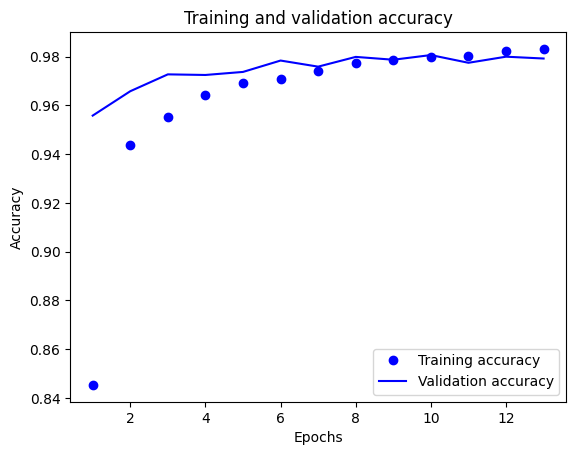

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.9765 - loss: 0.0859
['loss', 'compile_metrics']
[0.07149688154459, 0.9801999926567078]


In [107]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(640, activation = 'relu',input_shape = (28 * 28,)))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Dense(320, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Dense(160, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Dense(80, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Dense(40, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer=Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train_s,
                   y_train_s,
                   epochs = 20,
                   batch_size = 120,
                   validation_data = (x_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

### Model 9 result: 
- runtime: 33.4s <font color = 'green'>&#8595;</font>
- actual epochs: 13 <font color = 'green'>&#8595;</font>
- test loss: 0.0715 <font color = 'green'>&#8595;</font>
- test accuracy: 0.9802<font color = 'green'>&#8593;</font>

Summary:        
Adding both dropout rate and batch normalization will do a better job than just doing one of the two. The computing time is faster due to reaching the best epoch earlier. However, I'd still say model 2 with no dropout rate and batch normalization is the best. 

### Comment on which techniques/methods you used to build the best model with the highest accuracy.  

### Model 2 (focus: num of layers, units):
- leanring rate: 0.001
- batch size: 120
- dropout: N/A
- batch Normalization: N/A
- regularization: N/A
- ***<font color='orange'>num of layers: 6</font>***
- ***<font color='orange'>units: [640, 320, 160, 80, 40, 20, 10]</font>***
- optimizer: adam (according to google AI: this one is best for image classification problems) 

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8371 - loss: 0.5290 - val_accuracy: 0.9592 - val_loss: 0.1329
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9683 - loss: 0.1006 - val_accuracy: 0.9681 - val_loss: 0.1046
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9793 - loss: 0.0664 - val_accuracy: 0.9740 - val_loss: 0.0954
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9849 - loss: 0.0479 - val_accuracy: 0.9733 - val_loss: 0.0934
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.9763 - val_loss: 0.0912
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9897 - loss: 0.0312 - val_accuracy: 0.9731 - val_loss: 0.1043
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9782 - val_loss: 0.0904
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9933 - loss: 0.0211 - val_accuracy: 0.

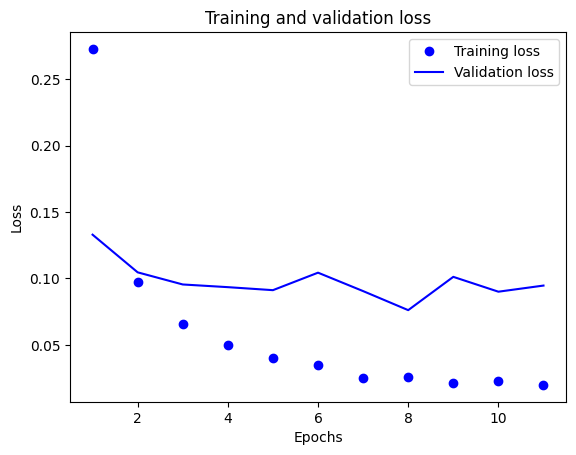

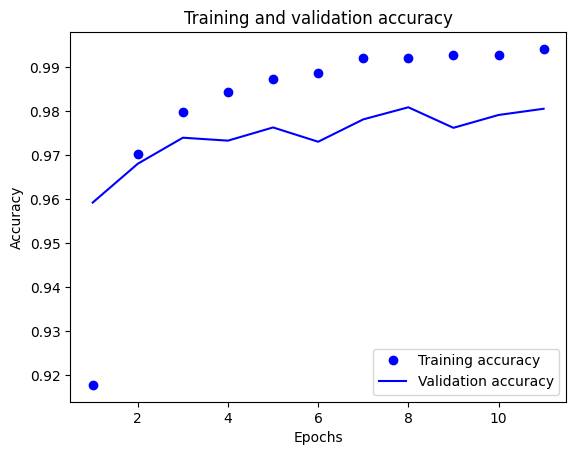

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.9774 - loss: 0.0815
['loss', 'compile_metrics']
[0.06703899055719376, 0.9812999963760376]


In [ ]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(640, activation = 'relu',input_shape = (28 * 28,)))
#model.add(layers.Dense(640, activation = 'relu'))
model.add(layers.Dense(320, activation = 'relu'))
model.add(layers.Dense(160, activation = 'relu'))
model.add(layers.Dense(80, activation = 'relu'))
model.add(layers.Dense(40, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.compile(optimizer=Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train_s,
                   y_train_s,
                   epochs = 20,
                   batch_size = 120,
                   validation_data = (x_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

### Model 2 result: 
- runtime: 22.8s 
- actual epochs: 11 
- ***<font color='green'>test loss: 0.0670</font>***    Winner!!!
- ***<font color='green'>test accuracy: 0.9813</font>***    Winner!!!

Summary:

After trying all different methods, I found model 2(actually model 5 because I tried many times to get the best layer and units) the best model. I did see the potential of adding regularizations or dropout or batch normalizations to the model. In this case we are doing a simple question of identifing number from distinguishable backgrounds. No noise, easy to identify shapes. I will try these things with a different dataset that is more complicated and see if they can do significantly better. 